# import libraries

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import timm
import torch
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from torch import nn, optim
import os
import sys
from dataset import create_dataloaders  # Import create_dataloaders function from dataset.py


print(f"PyTorch version: {torch.__version__}")
print(f"CUDA available: {torch.cuda.is_available()}")
if torch.cuda.is_available():
    print(f"Current GPU: {torch.cuda.get_device_name(0)}")
%matplotlib inline
plt.rcParams['font.sans-serif'] = ['SimHei']  # For displaying Chinese labels normally
plt.rcParams['axes.unicode_minus'] = False  # For displaying minus signs normally

sys.path.append(os.path.abspath(".."))
# Set data path
data_root = os.path.abspath(os.path.join("..","Aerial_Landscapes"))
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Can try different augmentation strategies for training
strategies = ['new', 'minimal', 'extensive', 'default']
num_classes = 15
# Set training parameters
batch_size = 64
num_epochs = 5
learning_rate = 0.0001
class_weights = torch.ones(15)

# Increase weights for easily confused classes
class_weights[0] = 1.2
class_weights[6] = 1.2
class_weights[3] = 1.2
class_weights[13] = 1.2
class_weights[11] = 1.5
class_weights[8] = 1.5
class_weights[14] = 1.2
class_weights = class_weights.to(device)

def create_model(num_classes=15, mode='train',print_structure=False):
    if mode == 'train':
        # Use larger model version
        model = timm.create_model('vit_base_patch16_224', pretrained=True, drop_rate=0.15, attn_drop_rate=0.1)

        # Add more complex classification head
        in_features = model.head.in_features
        model.head = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.1),
            nn.Linear(512, num_classes)
        )
    else:
        model = timm.create_model('vit_base_patch16_224', pretrained=False)
        in_features = model.head.in_features
        model.head = nn.Sequential(
            nn.Linear(in_features, 512),
            nn.BatchNorm1d(512),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(512, num_classes)
        )
    if print_structure:
        print(model)
    return model
# Visualize confusion matrix
def plot_confusion_matrix(conf_matrix, classes):
    print("Drawing confusion matrix...")
    plt.figure(figsize=(15, 12),dpi=100)
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
                xticklabels=classes, yticklabels=classes)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plt.savefig('confusion_matrix.png')
    plt.show()

    print(f"Confusion matrix has been saved as 'confusion_matrix.png'")

PyTorch version: 2.6.0+cu126
CUDA available: True
Current GPU: NVIDIA GeForce RTX 4060 Ti



=== Training with new ===


D:\develop\miniconda3\envs\torchgpu3132\Lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


Epoch 1/5 | Loss: 115.0662 | Train Acc: 0.8314 | Val Acc: 0.9337 | Val Loss: 28.3658
Epoch 2/5 | Loss: 78.8489 | Train Acc: 0.9460 | Val Acc: 0.9229 | Val Loss: 28.9844
Epoch 3/5 | Loss: 77.3565 | Train Acc: 0.9522 | Val Acc: 0.9129 | Val Loss: 30.5455
Epoch 4/5 | Loss: 76.1636 | Train Acc: 0.9564 | Val Acc: 0.9396 | Val Loss: 27.7803
Epoch 5/5 | Loss: 74.3017 | Train Acc: 0.9629 | Val Acc: 0.9467 | Val Loss: 26.9842


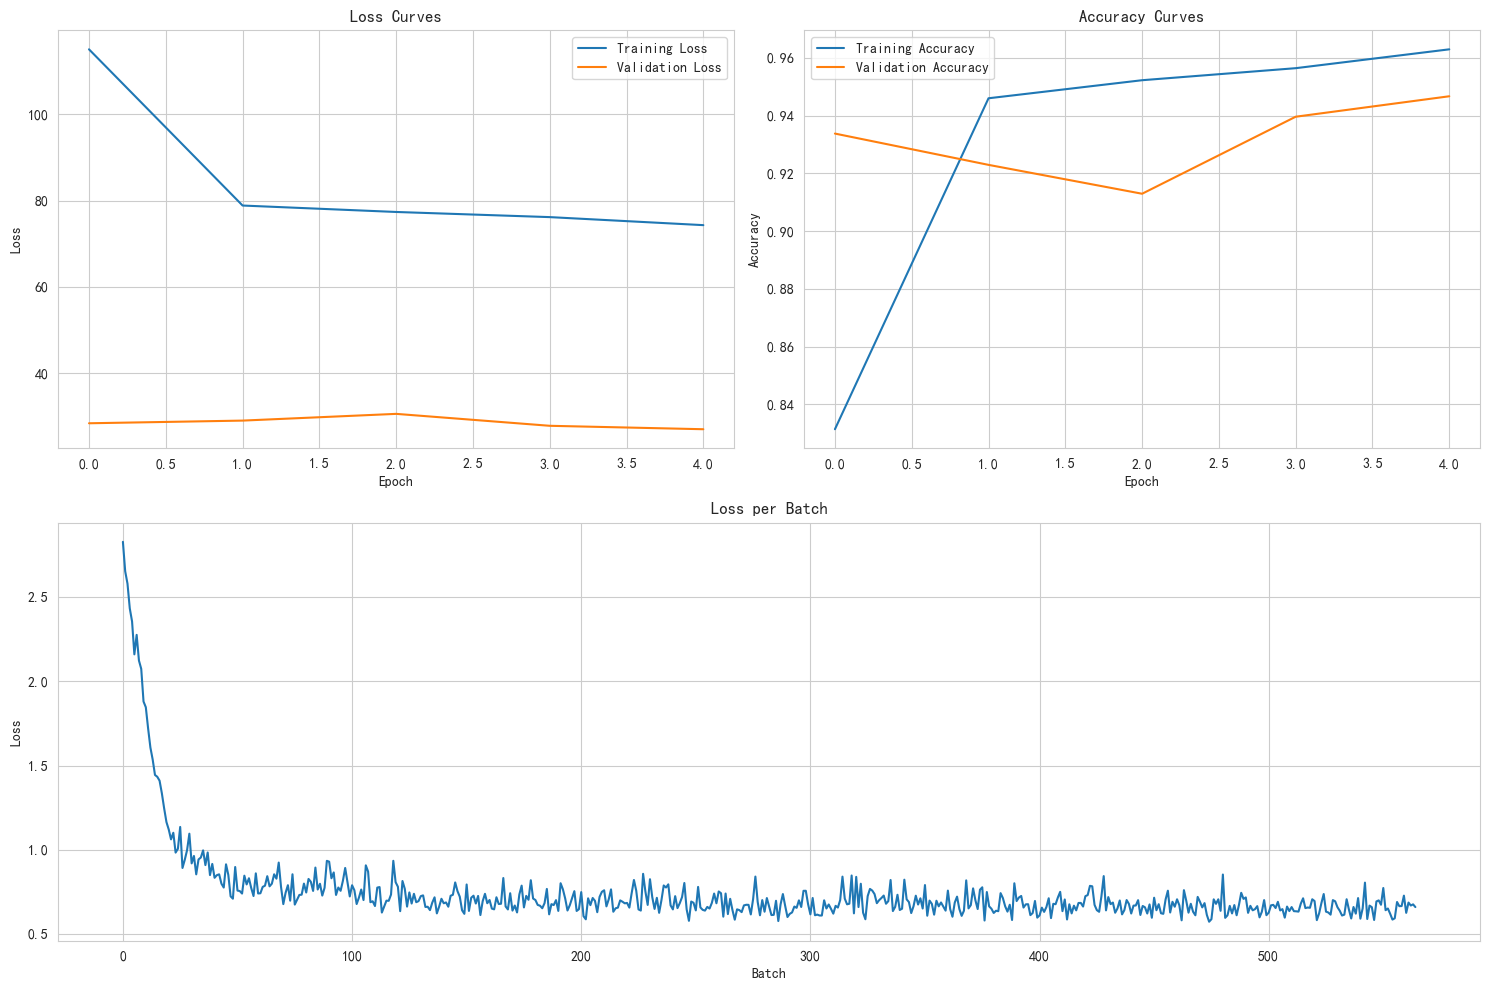


=== Training with minimal ===
Epoch 1/5 | Loss: 98.0697 | Train Acc: 0.8964 | Val Acc: 0.9292 | Val Loss: 28.3121
Epoch 2/5 | Loss: 71.3734 | Train Acc: 0.9767 | Val Acc: 0.9250 | Val Loss: 28.4820
Epoch 3/5 | Loss: 68.1533 | Train Acc: 0.9874 | Val Acc: 0.9363 | Val Loss: 27.7262
Epoch 4/5 | Loss: 66.8839 | Train Acc: 0.9899 | Val Acc: 0.9033 | Val Loss: 30.9408
Epoch 5/5 | Loss: 67.5263 | Train Acc: 0.9875 | Val Acc: 0.9204 | Val Loss: 29.6492


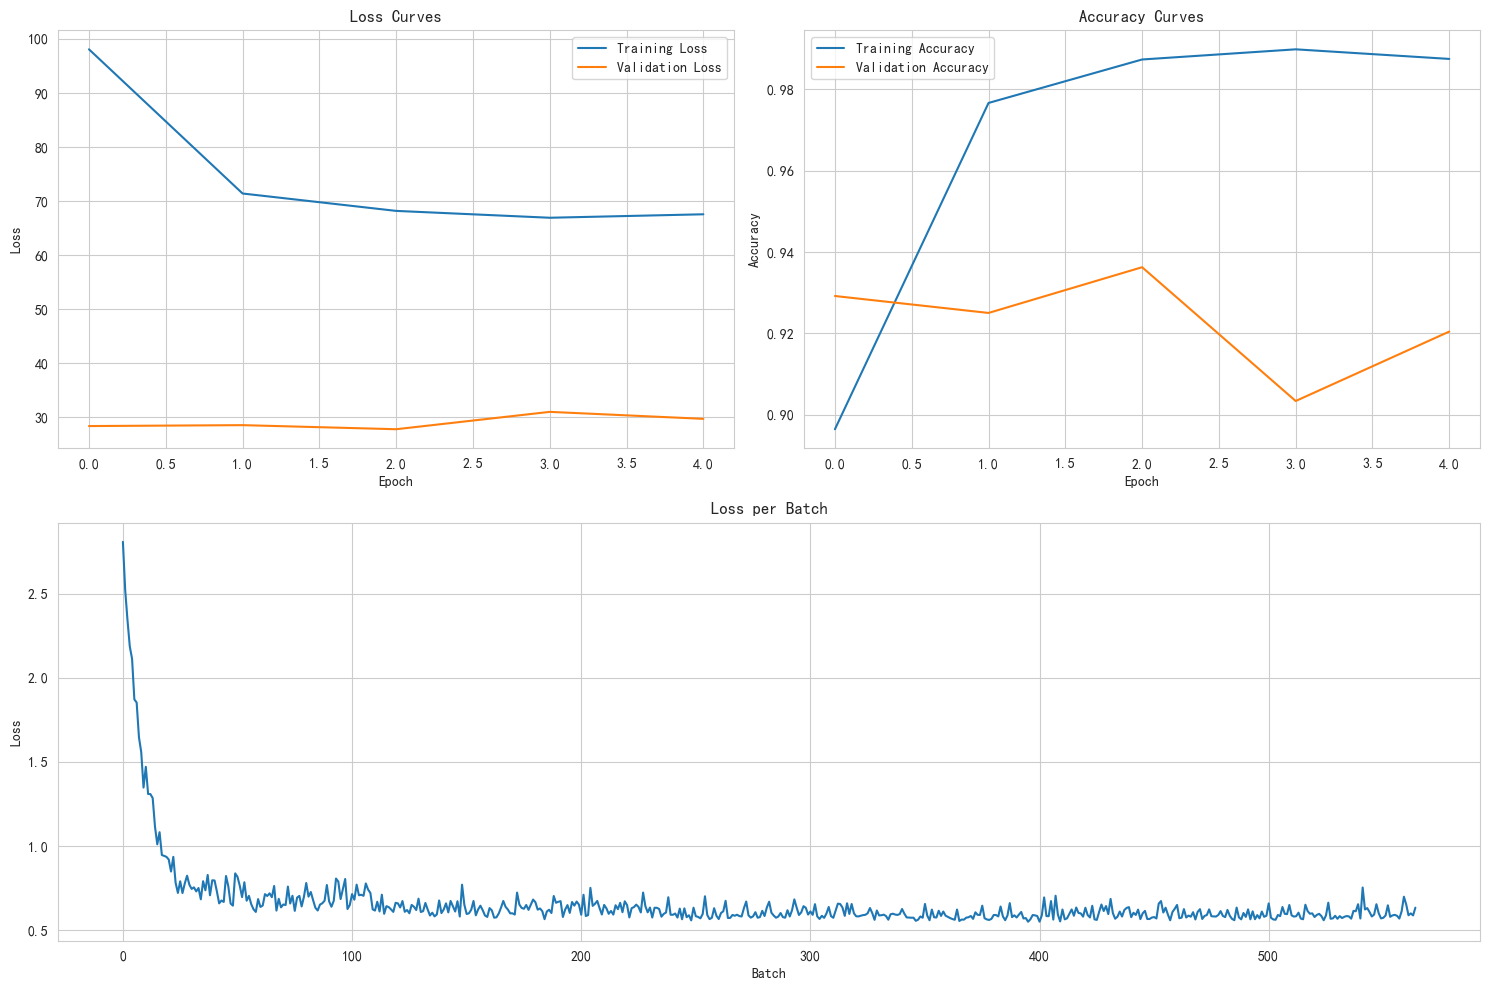


=== Training with extensive ===
Epoch 1/5 | Loss: 125.1062 | Train Acc: 0.7951 | Val Acc: 0.8454 | Val Loss: 36.0290
Epoch 2/5 | Loss: 89.2543 | Train Acc: 0.9133 | Val Acc: 0.9200 | Val Loss: 29.7444
Epoch 3/5 | Loss: 85.0439 | Train Acc: 0.9263 | Val Acc: 0.9075 | Val Loss: 30.3801
Epoch 4/5 | Loss: 80.3373 | Train Acc: 0.9418 | Val Acc: 0.9021 | Val Loss: 31.1531
Epoch 5/5 | Loss: 79.4383 | Train Acc: 0.9442 | Val Acc: 0.9254 | Val Loss: 28.8225


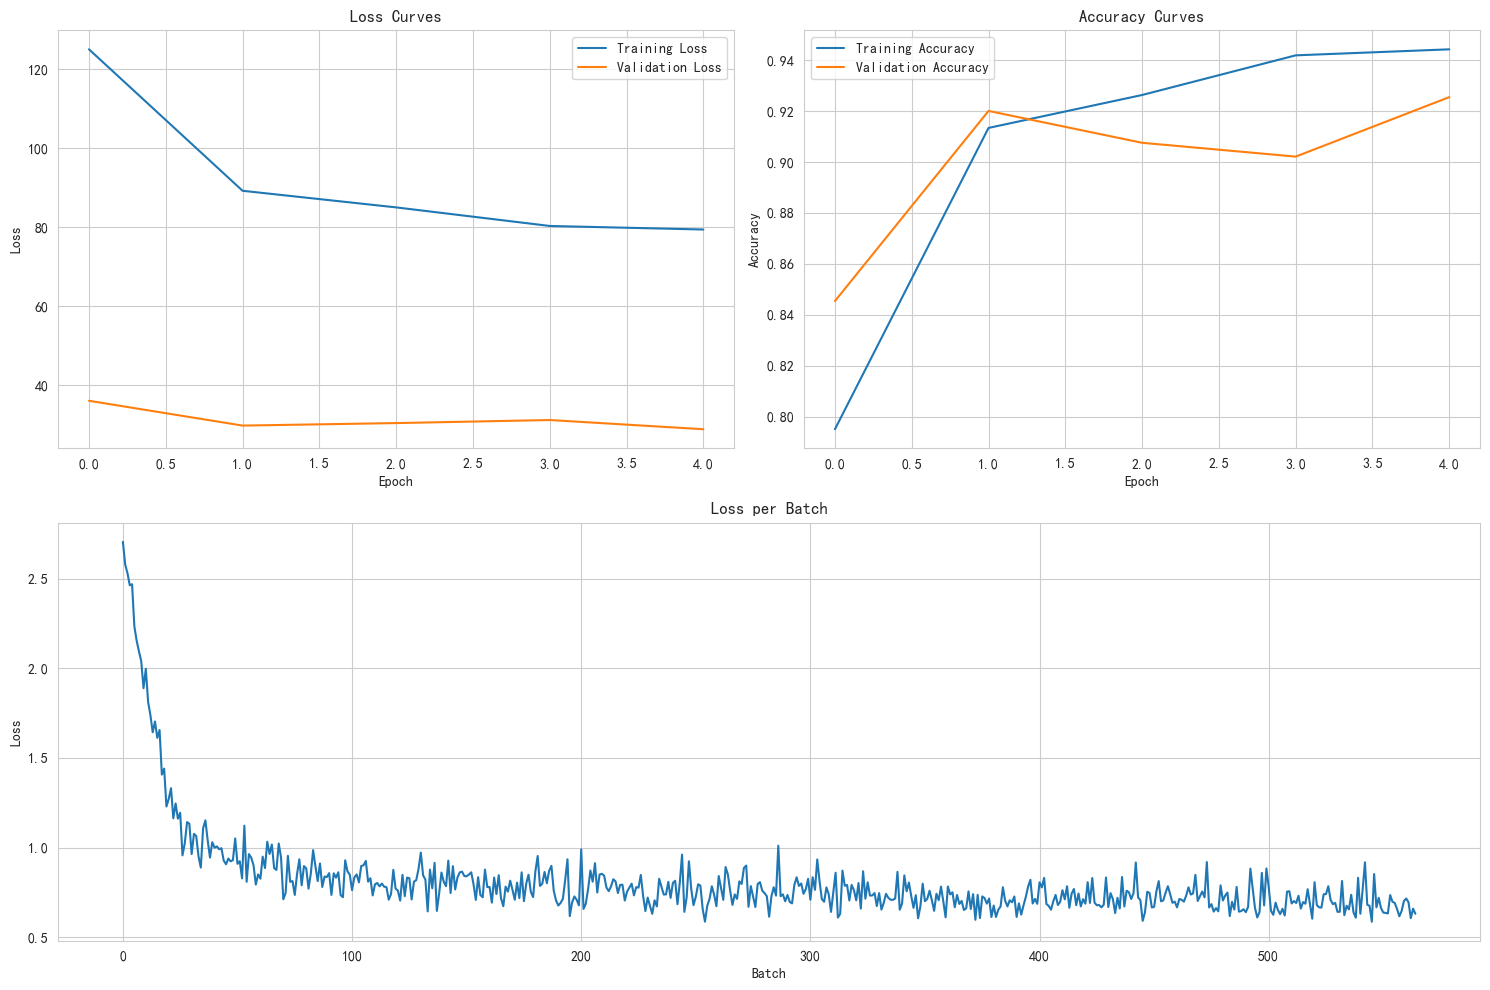


=== Training with default ===
Epoch 1/5 | Loss: 111.3161 | Train Acc: 0.8431 | Val Acc: 0.8875 | Val Loss: 32.1097
Epoch 2/5 | Loss: 80.2108 | Train Acc: 0.9440 | Val Acc: 0.9108 | Val Loss: 29.9950
Epoch 3/5 | Loss: 79.1348 | Train Acc: 0.9454 | Val Acc: 0.9325 | Val Loss: 28.2965
Epoch 4/5 | Loss: 74.9619 | Train Acc: 0.9632 | Val Acc: 0.9383 | Val Loss: 27.8368
Epoch 5/5 | Loss: 73.4479 | Train Acc: 0.9676 | Val Acc: 0.9358 | Val Loss: 27.7495


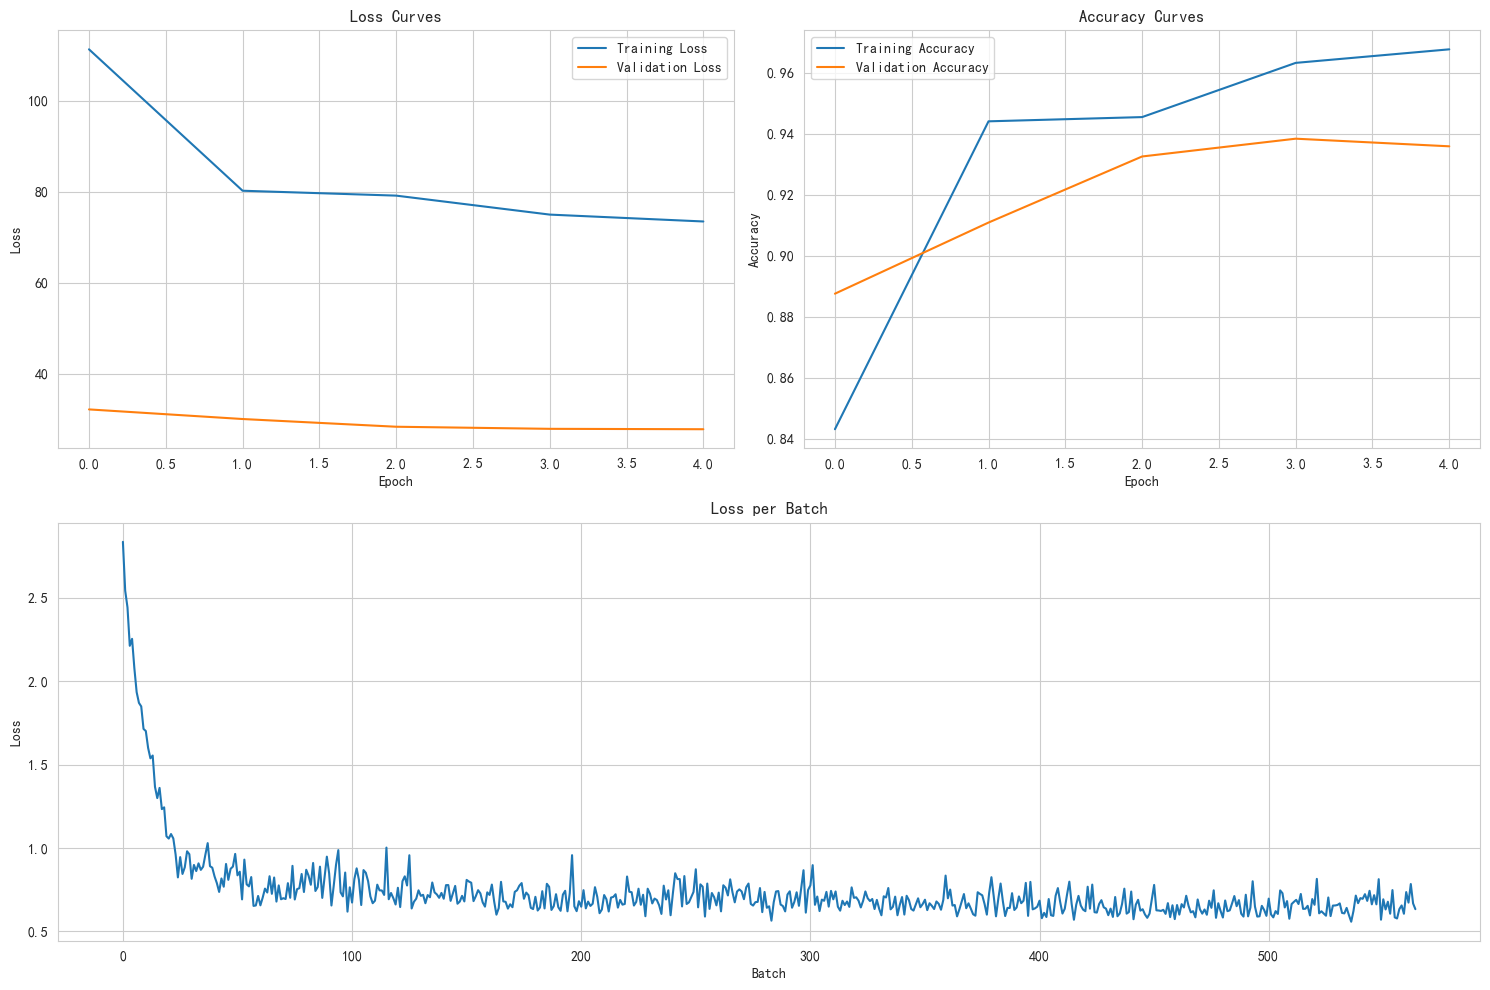

Global best: new @ 0.9467


In [2]:
global_best_acc = 0.0
global_best_state = None
global_best_strategy = None

for st in strategies:
    print(f"\n=== Training with {st} ===")
    train_loader, val_loader, _, class_names = create_dataloaders(
        root_dir=data_root, batch_size=batch_size, augmentation_strategy=st, verbose=False
    )

    model = create_model(num_classes)
    model = model.to(device)
    criterion = nn.CrossEntropyLoss(weight=class_weights, label_smoothing=0.1)
    optimizer = optim.AdamW(model.parameters(), lr=learning_rate, weight_decay=1e-5)
    scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=3, verbose=True)

    best_val_acc = 0.0
    best_state = None
    history = {'train_loss': [], 'val_loss': [], 'train_acc': [], 'val_acc': [],'batch_losses':[]}

    for epoch in range(num_epochs):
        model.train()
        train_loss = 0.0
        correct = total = 0

        for batch_idx, (inputs, labels) in enumerate(train_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            history['batch_losses'].append(loss.detach().cpu().numpy())
            loss.backward()
            optimizer.step()
            train_loss += loss.item()
            _, predicted = torch.max(outputs, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        train_acc = correct / total
        history['train_loss'].append(train_loss)
        history['train_acc'].append(train_acc)

        model.eval()
        val_loss = 0
        correct = 0
        total = 0
        with torch.no_grad():
            for inputs, labels in val_loader:
                inputs, labels = inputs.to(device), labels.to(device)
                outputs = model(inputs)
                loss = criterion(outputs, labels)
                val_loss += loss.item()
                _, predicted = torch.max(outputs, 1)
                total += labels.size(0)
                correct += (predicted == labels).sum().item()

        val_acc = correct / total
        history['val_loss'].append(val_loss)
        history['val_acc'].append(val_acc)
        print(f"Epoch {epoch+1}/{num_epochs} | Loss: {train_loss:.4f} | Train Acc: {train_acc:.4f} | Val Acc: {val_acc:.4f} | Val Loss: {val_loss:.4f}")

        scheduler.step(train_loss)
        if val_acc > best_val_acc:
            best_val_acc = val_acc
            best_state = model.state_dict()

    if best_val_acc > global_best_acc:
        global_best_acc = best_val_acc
        global_best_state = best_state
        global_best_strategy = st

    # Draw a training curve
    plt.figure(figsize=(15,10))
    plt.subplot(2,2,1)
    plt.plot(history['train_loss'], label='Training Loss')
    plt.plot(history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch'); plt.ylabel('Loss'); plt.title('Loss Curves'); plt.legend()

    plt.subplot(2,2,2)
    plt.plot(history['train_acc'], label='Training Accuracy')
    plt.plot(history['val_acc'], label='Validation Accuracy')
    plt.xlabel('Epoch'); plt.ylabel('Accuracy'); plt.title('Accuracy Curves'); plt.legend()

    plt.subplot(2,1,2)
    plt.plot(range(len(history['batch_losses'])), history['batch_losses'])
    plt.xlabel('Batch'); plt.ylabel('Loss'); plt.title('Loss per Batch'); plt.grid(True)

    plt.tight_layout()
    plt.show()
    del model,history,criterion,optimizer,scheduler,train_loader,val_loader,_
    torch.cuda.empty_cache()

# Save the global best model
os.makedirs("saved_models_vit", exist_ok=True)
torch.save(global_best_state, f"saved_models_vit/best_vit_{global_best_strategy}.pth")
print(f"Global best: {global_best_strategy} @ {global_best_acc:.4f}")

In [3]:
# Load the best model
global_best_strategy = 'new'
best_model = create_model(num_classes=num_classes, mode='test')
best_model.load_state_dict(torch.load(f"saved_models_vit/best_vit_{global_best_strategy}.pth"))
print("Best model loaded")

_, _, test_loader, classes = create_dataloaders(
    root_dir=data_root,
    batch_size=batch_size,
    augmentation_strategy='minimal',
    split_ratio=[0.6, 0.2, 0.2],
    random_seed=42,
    num_workers=0,
    verbose=False
)

def test_model(model, test_loader, classes):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    y_true = []
    y_pred = []

    # Add progress display
    total_batches = len(test_loader)

    with torch.no_grad():
        for batch_idx, (inputs, labels) in enumerate(test_loader):
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs, 1)

            y_true.extend(labels.cpu().numpy())
            y_pred.extend(predicted.cpu().numpy())

            print(f"Testing progress: {batch_idx + 1}/{total_batches} batches", end='\r')

    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, y_pred)

    # Calculate classification report
    report = classification_report(y_true, y_pred, target_names=classes)

    # Calculate overall accuracy
    accuracy = accuracy_score(y_true, y_pred)

    print(f"\nTesting complete! Overall accuracy: {accuracy:.4f}")

    return conf_matrix, report, accuracy, y_true, y_pred

# Run the test
print("\nTesting the model...")
conf_matrix, report, accuracy, y_true, y_pred = test_model(best_model, test_loader, classes)
# Print test results
print(f"\nTest accuracy: {accuracy:.4f}")
print("\nClassification report:")
print(report)
print("\nConfusion matrix:")
print(conf_matrix)



Best model loaded

Testing the model...
Testing progress: 38/38 batches
Testing complete! Overall accuracy: 0.9550

Test accuracy: 0.9550

Classification report:
              precision    recall  f1-score   support

 Agriculture       0.98      0.97      0.97       160
     Airport       0.82      0.96      0.88       160
       Beach       0.99      0.99      0.99       160
        City       0.99      0.94      0.96       160
      Desert       0.98      0.94      0.96       160
      Forest       0.97      0.99      0.98       160
   Grassland       0.97      0.97      0.97       160
     Highway       0.98      0.93      0.95       160
        Lake       0.94      0.99      0.96       160
    Mountain       0.90      0.96      0.93       160
     Parking       1.00      0.88      0.94       160
        Port       0.95      0.99      0.97       160
     Railway       0.93      0.96      0.94       160
 Residential       0.98      0.99      0.98       160
       River       0.99    

Drawing confusion matrix...


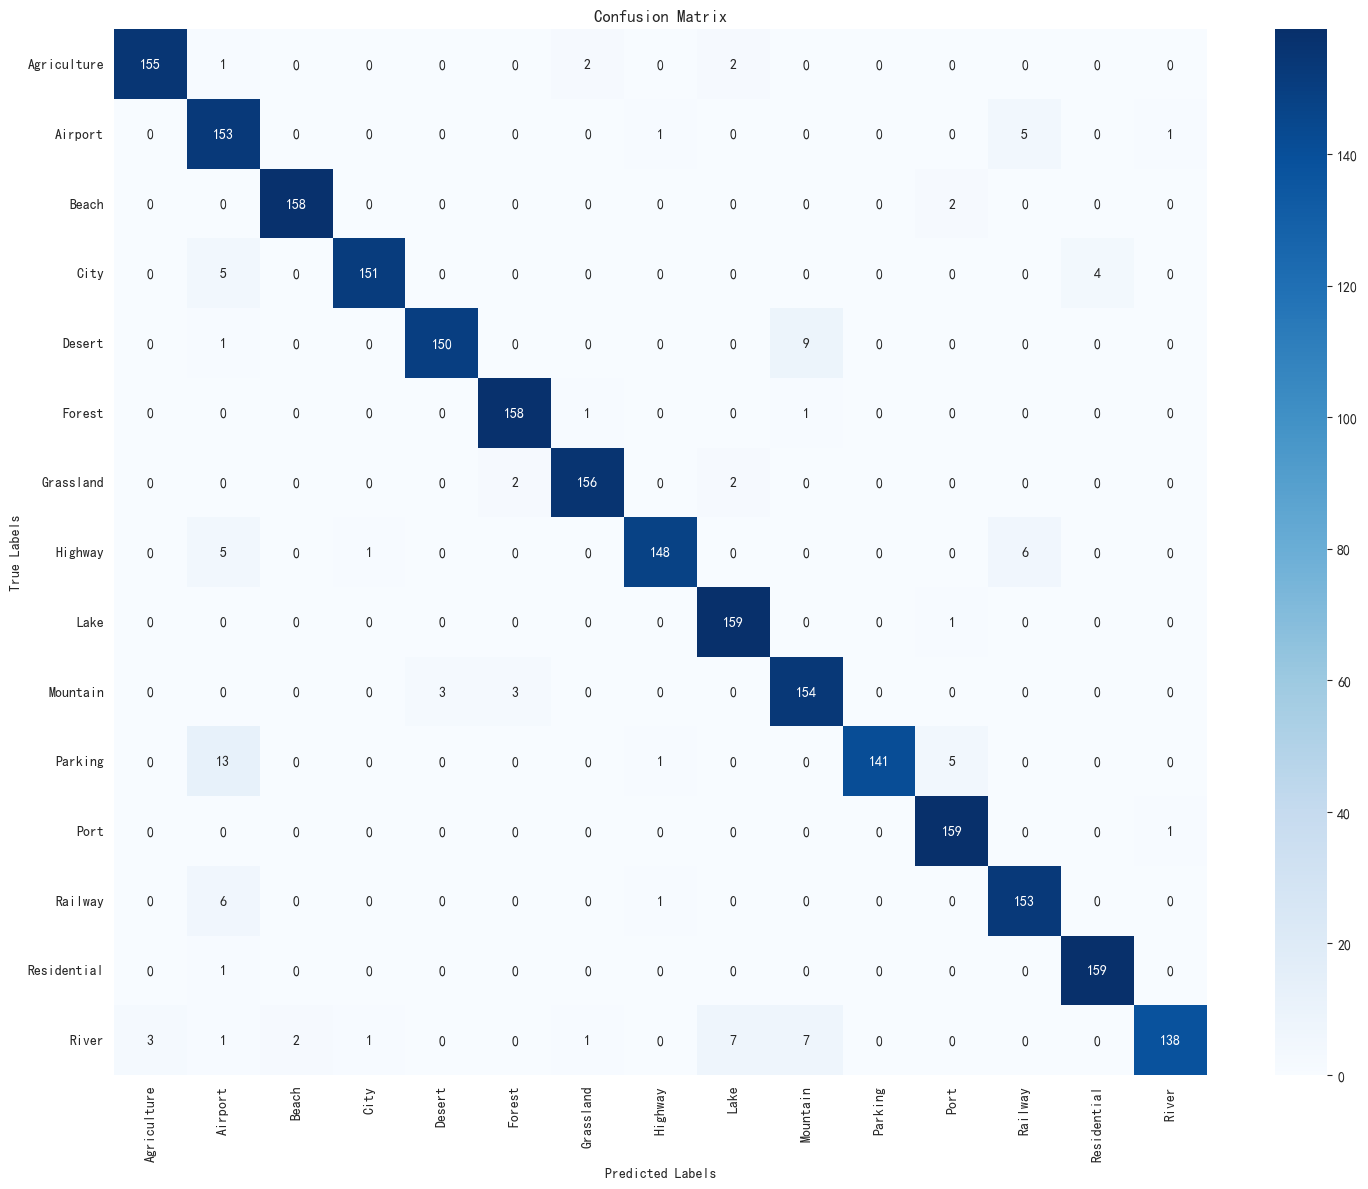

Confusion matrix has been saved as 'confusion_matrix.png'


In [5]:
# Visualize confusion matrix
plot_confusion_matrix(conf_matrix, classes)

# Show all incorrect predictions



Visualizing incorrect predictions...
Found 108 incorrect predictions
Only showing the first 10 incorrect predictions


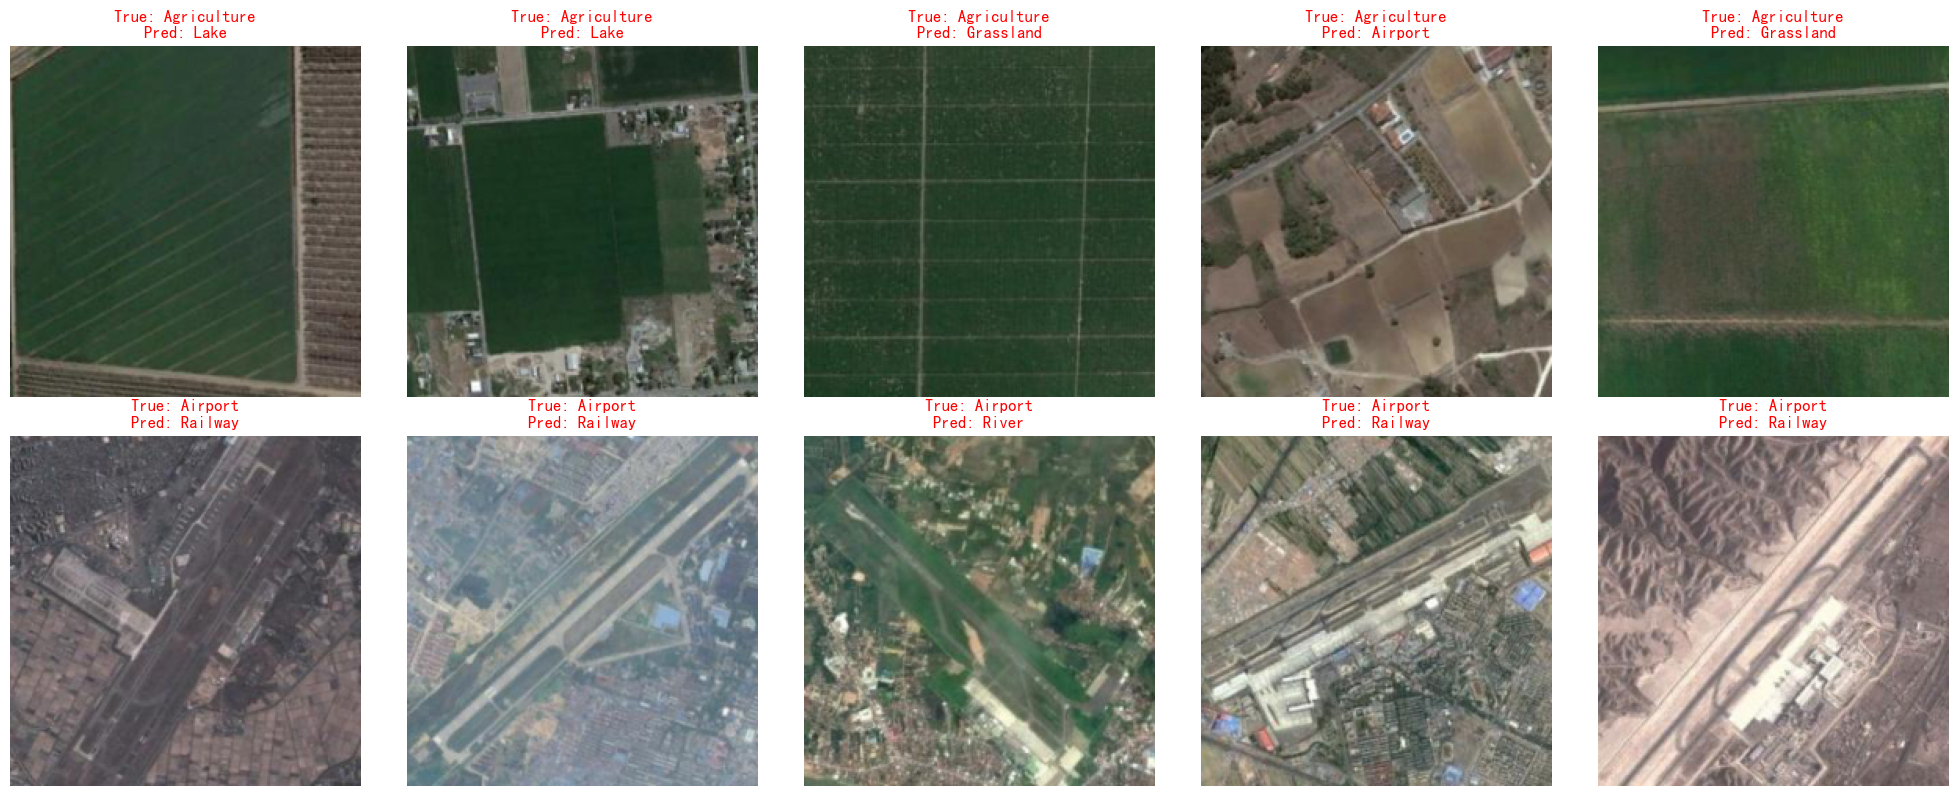

Misclassified images have been saved as 'misclassified_images.png'


In [6]:
# Visualize incorrectly classified images
def visualize_misclassifications(model, test_loader, classes, y_true, y_pred, max_images=10):
    """
    Visualize incorrectly classified images from the test set

    Args:
        model: Trained model
        test_loader: Test data loader
        classes: List of class names
        y_true: List of true labels
        y_pred: List of predicted labels
        max_images: Maximum number of error images to display
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    # Find indices of all incorrect predictions
    misclassified_indices = [i for i, (y_t, y_p) in enumerate(zip(y_true, y_pred)) if y_t != y_p]
    print(f"Found {len(misclassified_indices)} incorrect predictions")

    if len(misclassified_indices) == 0:
        print("No incorrect predictions! Model performed perfectly")
        return

    # Limit the number of images to display
    if len(misclassified_indices) > max_images:
        print(f"Only showing the first {max_images} incorrect predictions")
        misclassified_indices = misclassified_indices[:max_images]

    # Create a dictionary to map test loader batch indices to actual images and labels
    all_images = []
    all_labels = []

    print("Collecting test data...")
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Add each image in the batch to the list
            for i in range(inputs.size(0)):
                all_images.append(inputs[i].cpu())
                all_labels.append(labels[i].item())

    # Check if indices are out of range
    valid_indices = [i for i in misclassified_indices if i < len(all_images)]
    if len(valid_indices) < len(misclassified_indices):
        print(f"Warning: {len(misclassified_indices) - len(valid_indices)} indices are out of range")

    # Calculate number of rows and columns needed
    n_cols = 5
    n_rows = (len(valid_indices) + n_cols - 1) // n_cols

    plt.figure(figsize=(20, 4 * n_rows),dpi=100)

    for i, idx in enumerate(valid_indices):
        # Get image and label
        img = all_images[idx]
        true_label = y_true[idx]
        pred_label = y_pred[idx]

        # Convert image format for display
        img = img.numpy().transpose((1, 2, 0))
        # Denormalize
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Plot image
        plt.subplot(n_rows, n_cols, i + 1)
        plt.imshow(img)
        plt.title(f"True: {classes[true_label]}\nPred: {classes[pred_label]}", color='red')
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('misclassified_images.png')
    plt.show()
    print(f"Misclassified images have been saved as 'misclassified_images.png'")

# Call function to show misclassified images
print("\nVisualizing incorrect predictions...")
visualize_misclassifications(best_model, test_loader, classes, y_true, y_pred)


# Grad-CAM visualization of model decisions



Visualizing model decisions using GradCAM...
Found 108 incorrect predictions and 2292 correct predictions
Generating GradCAM for incorrect predictions...
Generating GradCAM for correct predictions...


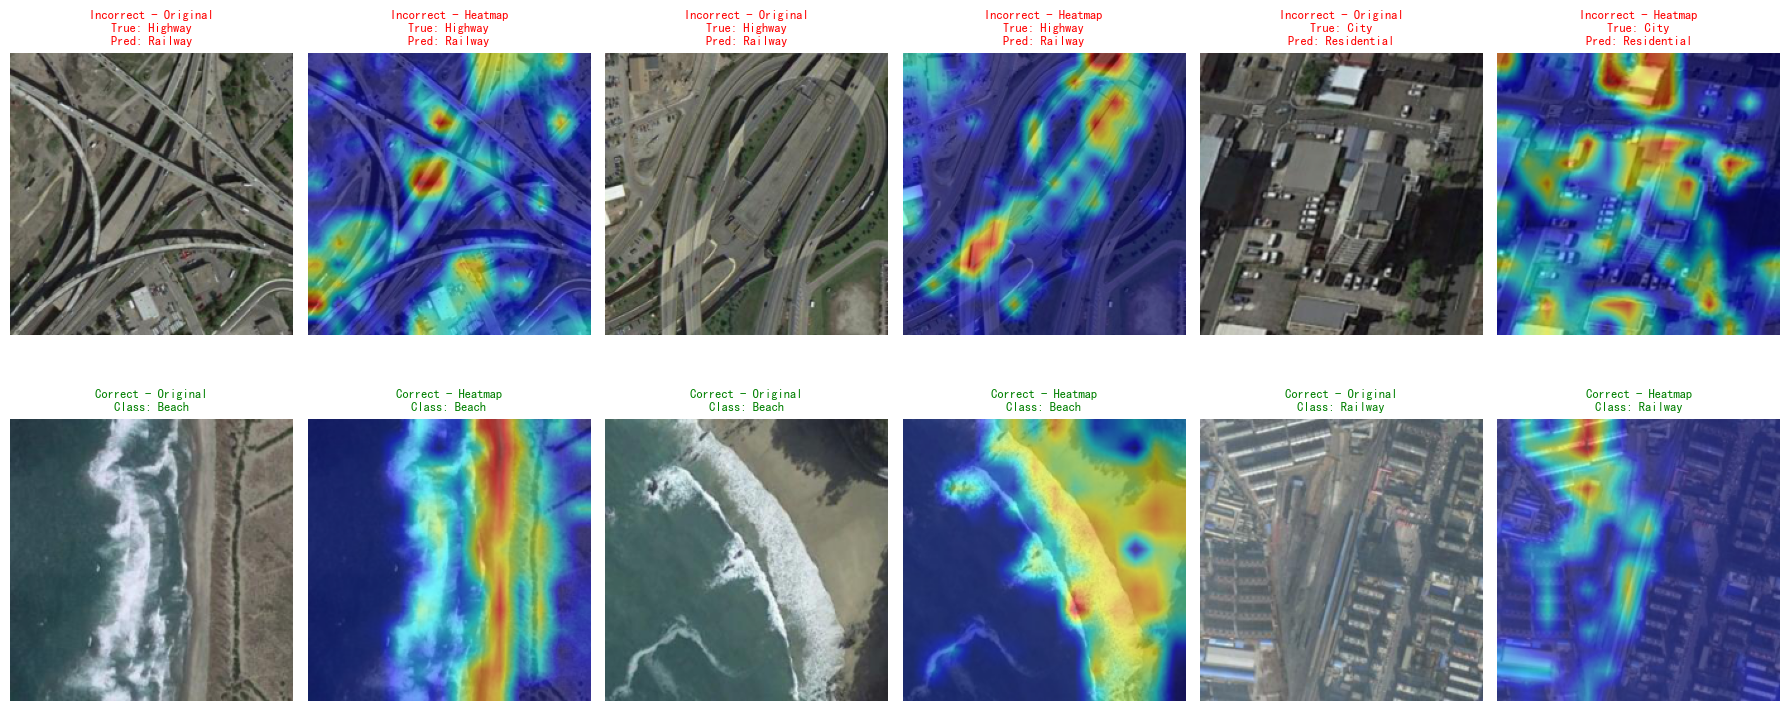

GradCAM visualizations have been saved as 'gradcam_visualization.png'


In [9]:
from pytorch_grad_cam import GradCAM, XGradCAM, GradCAMPlusPlus, AblationCAM, EigenCAM
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from pytorch_grad_cam.utils.reshape_transforms import vit_reshape_transform
def visualize_gradcam_samples(model, test_loader, classes, y_true, y_pred, num_images=3):
    """
    Use GradCAM to visualize areas of focus in correct and incorrect prediction samples

    Args:
        model: Trained model
        test_loader: Test data loader
        classes: List of class names
        y_true: List of true labels
        y_pred: List of predicted labels
        num_images: Number of images to display for each category (correct/incorrect)
    """
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model = model.to(device)
    model.eval()

    # Find indices of incorrect and correct predictions
    misclassified_indices = [i for i, (y_t, y_p) in enumerate(zip(y_true, y_pred)) if y_t != y_p]
    correctly_classified_indices = [i for i, (y_t, y_p) in enumerate(zip(y_true, y_pred)) if y_t == y_p]

    print(f"Found {len(misclassified_indices)} incorrect predictions and {len(correctly_classified_indices)} correct predictions")

    # Randomly select specified number of samples
    if len(misclassified_indices) > num_images:
        misclassified_indices = np.random.choice(misclassified_indices, num_images, replace=False)

    if len(correctly_classified_indices) > num_images:
        correctly_classified_indices = np.random.choice(correctly_classified_indices, num_images, replace=False)

    # Create GradCAM object
    # For ViT models, typically use layers from the last transformer block
    target_layers = [model.blocks[-1].norm1]  # First normalization layer in the last transformer block

    # Initialize GradCAM - removed use_cuda parameter
    cam = GradCAM(
        model=model,
        target_layers=target_layers,
        reshape_transform=vit_reshape_transform
    )

    # Collect all images and labels
    all_images = []
    all_labels = []

    print("Collecting test data...")
    with torch.no_grad():
        for inputs, labels in test_loader:
            # Add images from each batch
            for i in range(inputs.size(0)):
                all_images.append(inputs[i].cpu())
                all_labels.append(labels[i].item())

    # Set number of rows and columns for images
    n_rows = 2  # Incorrect and correct predictions
    n_cols = min(num_images, len(misclassified_indices), len(correctly_classified_indices))
    
    # Each example needs 2 columns: original and heatmap
    plt.figure(figsize=(n_cols * 6, n_rows * 4),dpi=100)

    # Visualize incorrect predictions
    print("Generating GradCAM for incorrect predictions...")
    for i, idx in enumerate(misclassified_indices[:n_cols]):
        # Get image and label
        img_tensor = all_images[idx].unsqueeze(0).to(device)
        true_label = y_true[idx]
        pred_label = y_pred[idx]

        # Apply GradCAM
        targets = [ClassifierOutputTarget(pred_label)]  # Use predicted class
        grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]

        # Convert image for display
        img = img_tensor.cpu().numpy().squeeze().transpose((1, 2, 0))
        # Denormalize
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Overlay GradCAM on image
        visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)

        # Calculate subplot indices
        orig_idx = i * 2 + 1
        cam_idx = i * 2 + 2
        
        # Show original image
        plt.subplot(n_rows, n_cols * 2, orig_idx)
        plt.imshow(img)
        plt.title(f"Incorrect - Original\nTrue: {classes[true_label]}\nPred: {classes[pred_label]}", color='red', fontsize=9)
        plt.axis('off')
        
        # Show GradCAM heatmap
        plt.subplot(n_rows, n_cols * 2, cam_idx)
        plt.imshow(visualization)
        plt.title(f"Incorrect - Heatmap\nTrue: {classes[true_label]}\nPred: {classes[pred_label]}", color='red', fontsize=9)
        plt.axis('off')

    # Visualize correct predictions
    print("Generating GradCAM for correct predictions...")
    for i, idx in enumerate(correctly_classified_indices[:n_cols]):
        # Get image and label
        img_tensor = all_images[idx].unsqueeze(0).to(device)
        true_label = y_true[idx]

        # Apply GradCAM
        targets = [ClassifierOutputTarget(true_label)]  # Use true class
        grayscale_cam = cam(input_tensor=img_tensor, targets=targets)
        grayscale_cam = grayscale_cam[0, :]

        # Convert image for display
        img = img_tensor.cpu().numpy().squeeze().transpose((1, 2, 0))
        # Denormalize
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        img = std * img + mean
        img = np.clip(img, 0, 1)

        # Overlay GradCAM on image
        visualization = show_cam_on_image(img, grayscale_cam, use_rgb=True)

        # Calculate subplot indices
        row_offset = n_cols * 2  # Offset for second row
        orig_idx = row_offset + i * 2 + 1
        cam_idx = row_offset + i * 2 + 2
        
        # Show original image
        plt.subplot(n_rows, n_cols * 2, orig_idx)
        plt.imshow(img)
        plt.title(f"Correct - Original\nClass: {classes[true_label]}", color='green', fontsize=9)
        plt.axis('off')
        
        # Show GradCAM heatmap
        plt.subplot(n_rows, n_cols * 2, cam_idx)
        plt.imshow(visualization)
        plt.title(f"Correct - Heatmap\nClass: {classes[true_label]}", color='green', fontsize=9)
        plt.axis('off')

    plt.tight_layout()
    plt.savefig('gradcam_visualization.png', dpi=100, bbox_inches='tight')
    plt.show()
    print(f"GradCAM visualizations have been saved as 'gradcam_visualization.png'")

# Call function
print("\nVisualizing model decisions using GradCAM...")
visualize_gradcam_samples(best_model, test_loader, classes, y_true, y_pred, num_images=3)
